# Glass Identification

# all library

In [110]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from pandas.plotting import scatter_matrix
import seaborn as sns
from sklearn.preprocessing import scale

import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from tpot import TPOTClassifier
from sklearn import decomposition
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OneHotEncoder


# read the database into a dataframe.

In [13]:
Headers = ["RI" , "Na", "Mg", "Al", "Si", "K", "Ca", "Ba", "Fe", "Type"]
data = pd.read_csv("Glass Identification.csv" , sep = "," , names = Headers)
data

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


# Here is the first 5 rows of the database.

In [14]:
data.head(5)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


# To describe the statistics of the database we have:

In [15]:
data.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


where RI is refractive index, Na is Sodium, Mg is Magnesium, Al is Aluminum, Si is Silicon, K is Potassium, Ca is Calcium, Ba is Barium, and Fe is Iron. Type would present the 6 different types of glass in the database including: 1) float processed building windows, 2) non float processed building windows, 3) float processed vehicle windows, 5) containers, 6) tableware, 7) headlamps.
Now let’s try to visualize the database a little bit more:

<Figure size 640x480 with 0 Axes>

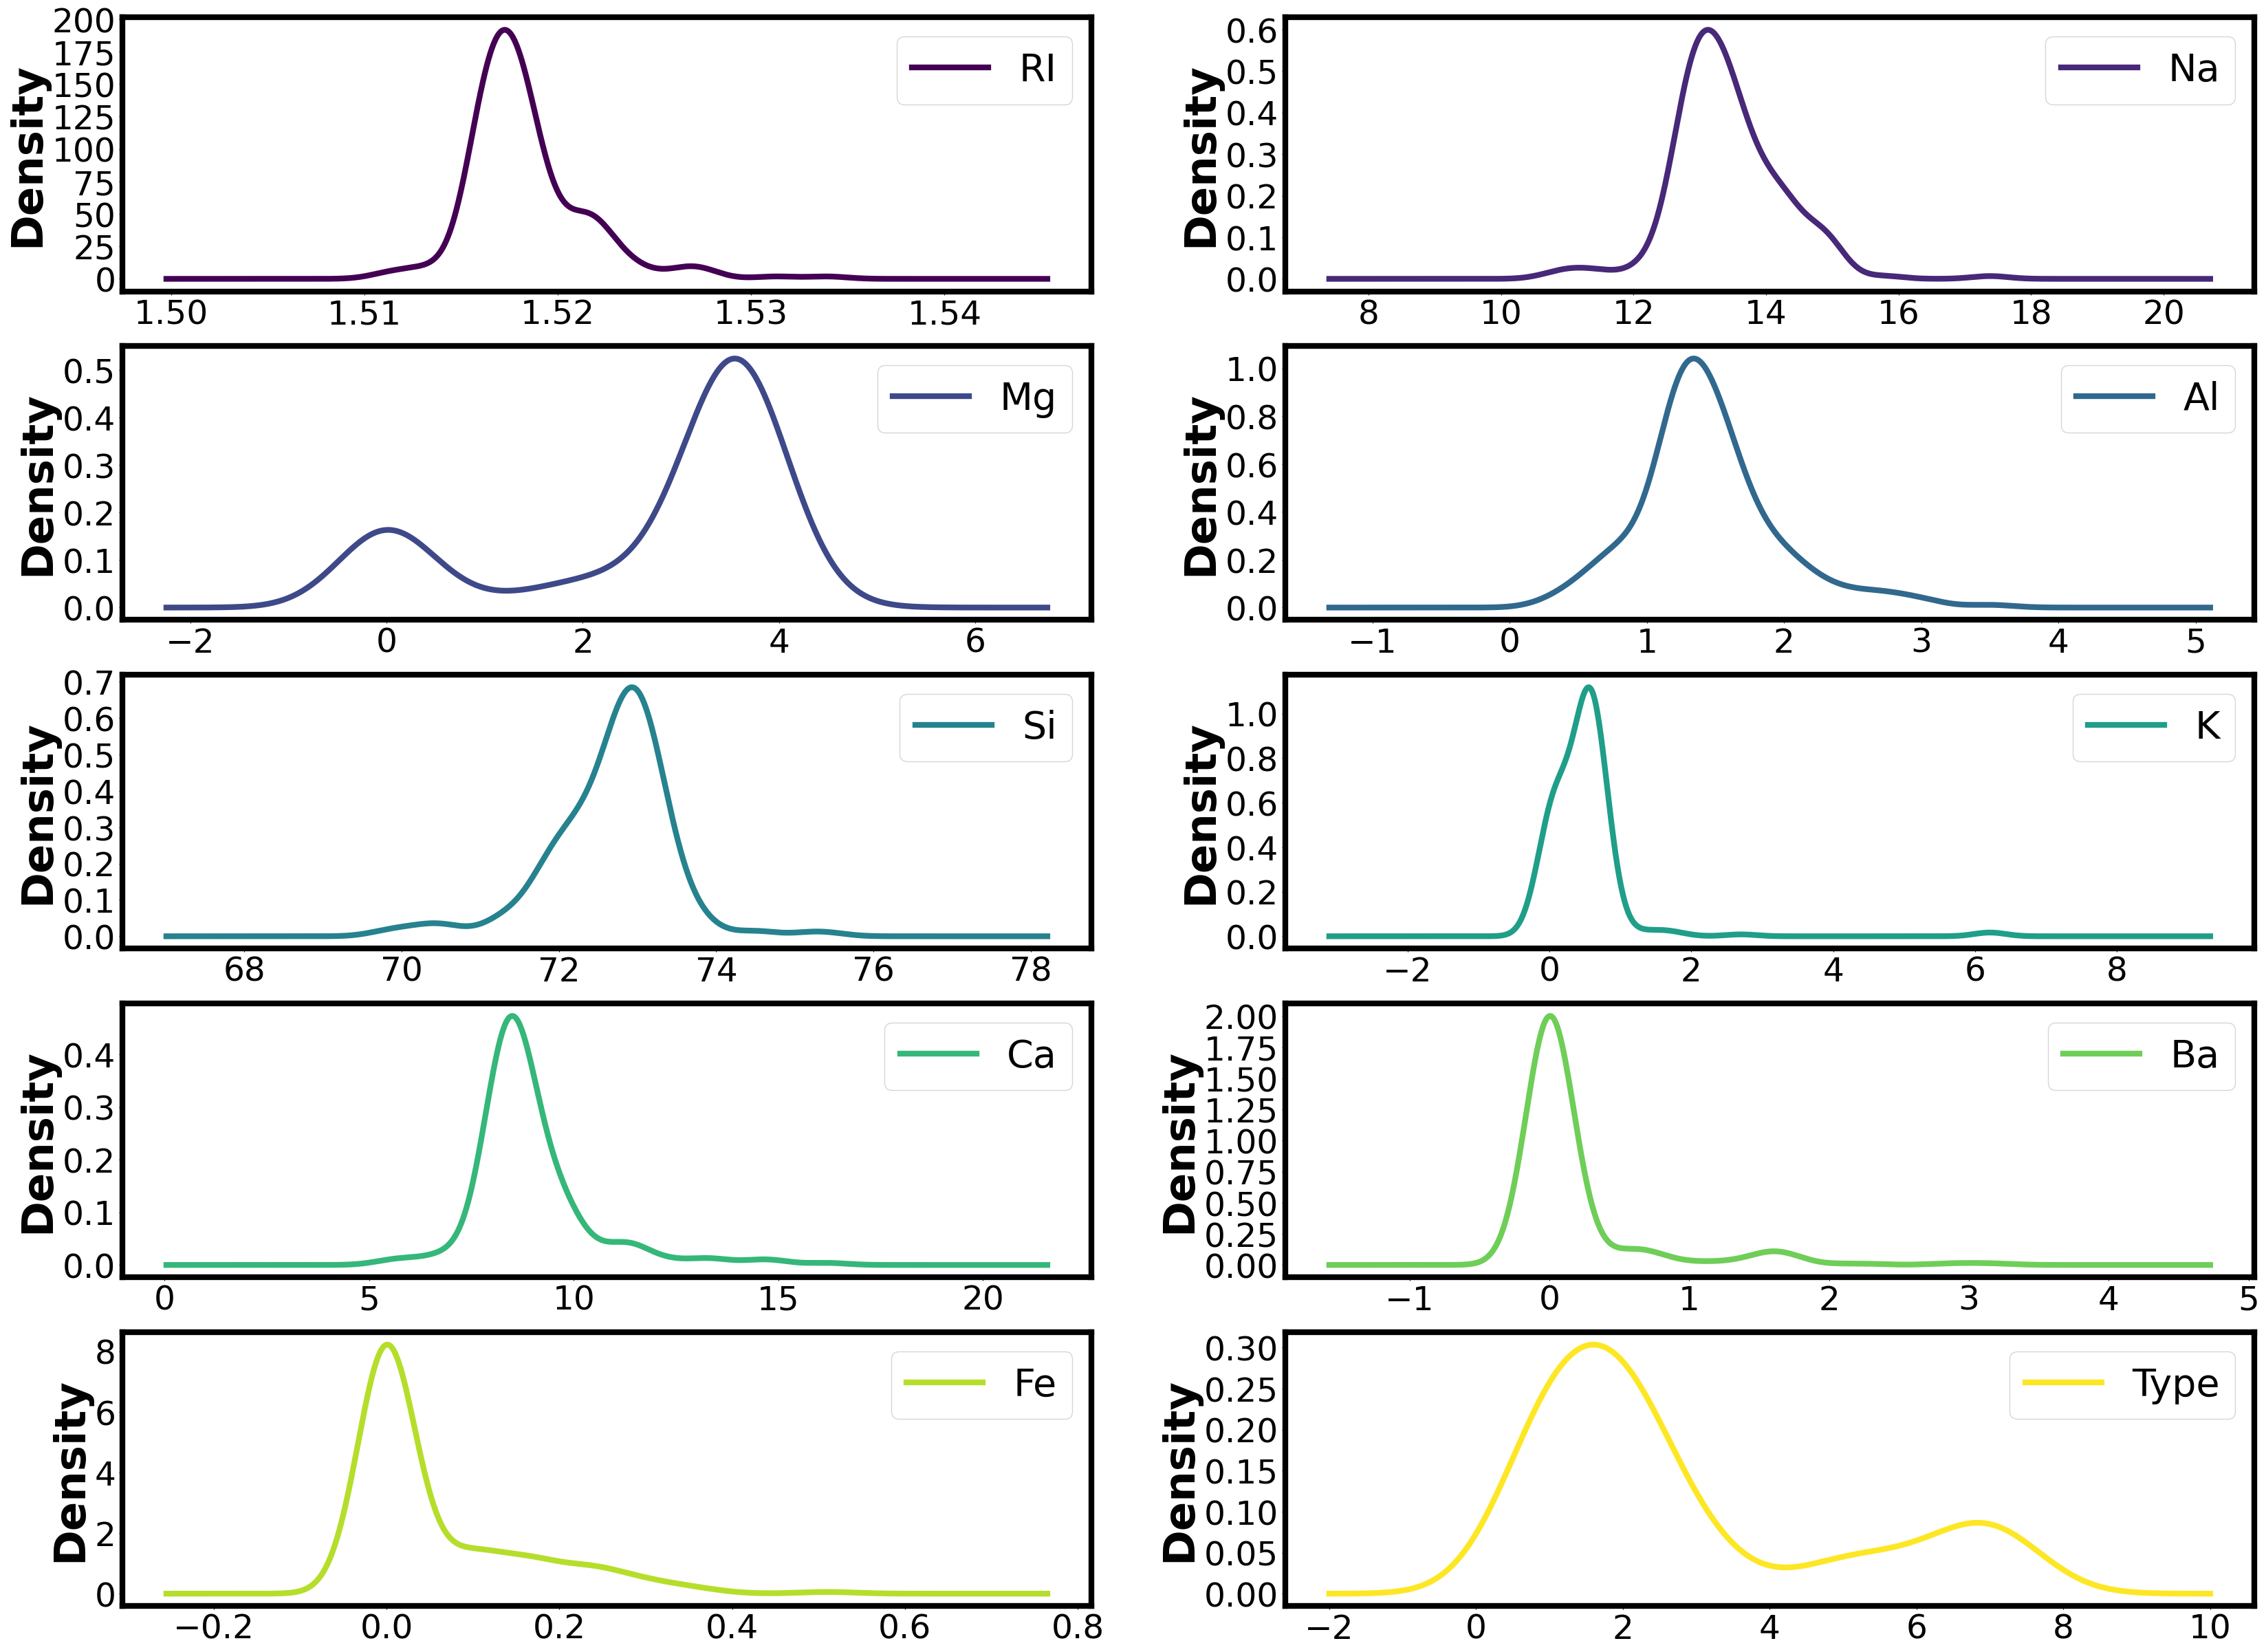

In [19]:
plt.figure()
mpl.rcParams['axes.linewidth'] = 6 #set the value globally
mpl.rcParams['legend.fontsize'] = 40 #set the value globally
Axes = data.plot(kind='density',lw=6, subplots=True, layout=(5,2),figsize=(40, 30),
                 sharex = False ,sharey=False, legend=True , colormap = "viridis")
[plt.setp(item.yaxis.get_majorticklabels(), 'size', 35) for item in Axes.ravel()]
[plt.setp(item.xaxis.get_majorticklabels(), 'size', 35) for item in Axes.ravel()]
[plt.setp(item.yaxis.get_label(), 'size', 45) for item in Axes.ravel()]
[plt.setp(item.xaxis.get_label(), 'size', 45) for item in Axes.ravel()]
[plt.setp(item.yaxis.get_label(), 'weight', 'bold') for item in Axes.ravel()]
plt.show()

# Here is the presentation of the scatter matrix of the database.

<Figure size 640x480 with 0 Axes>

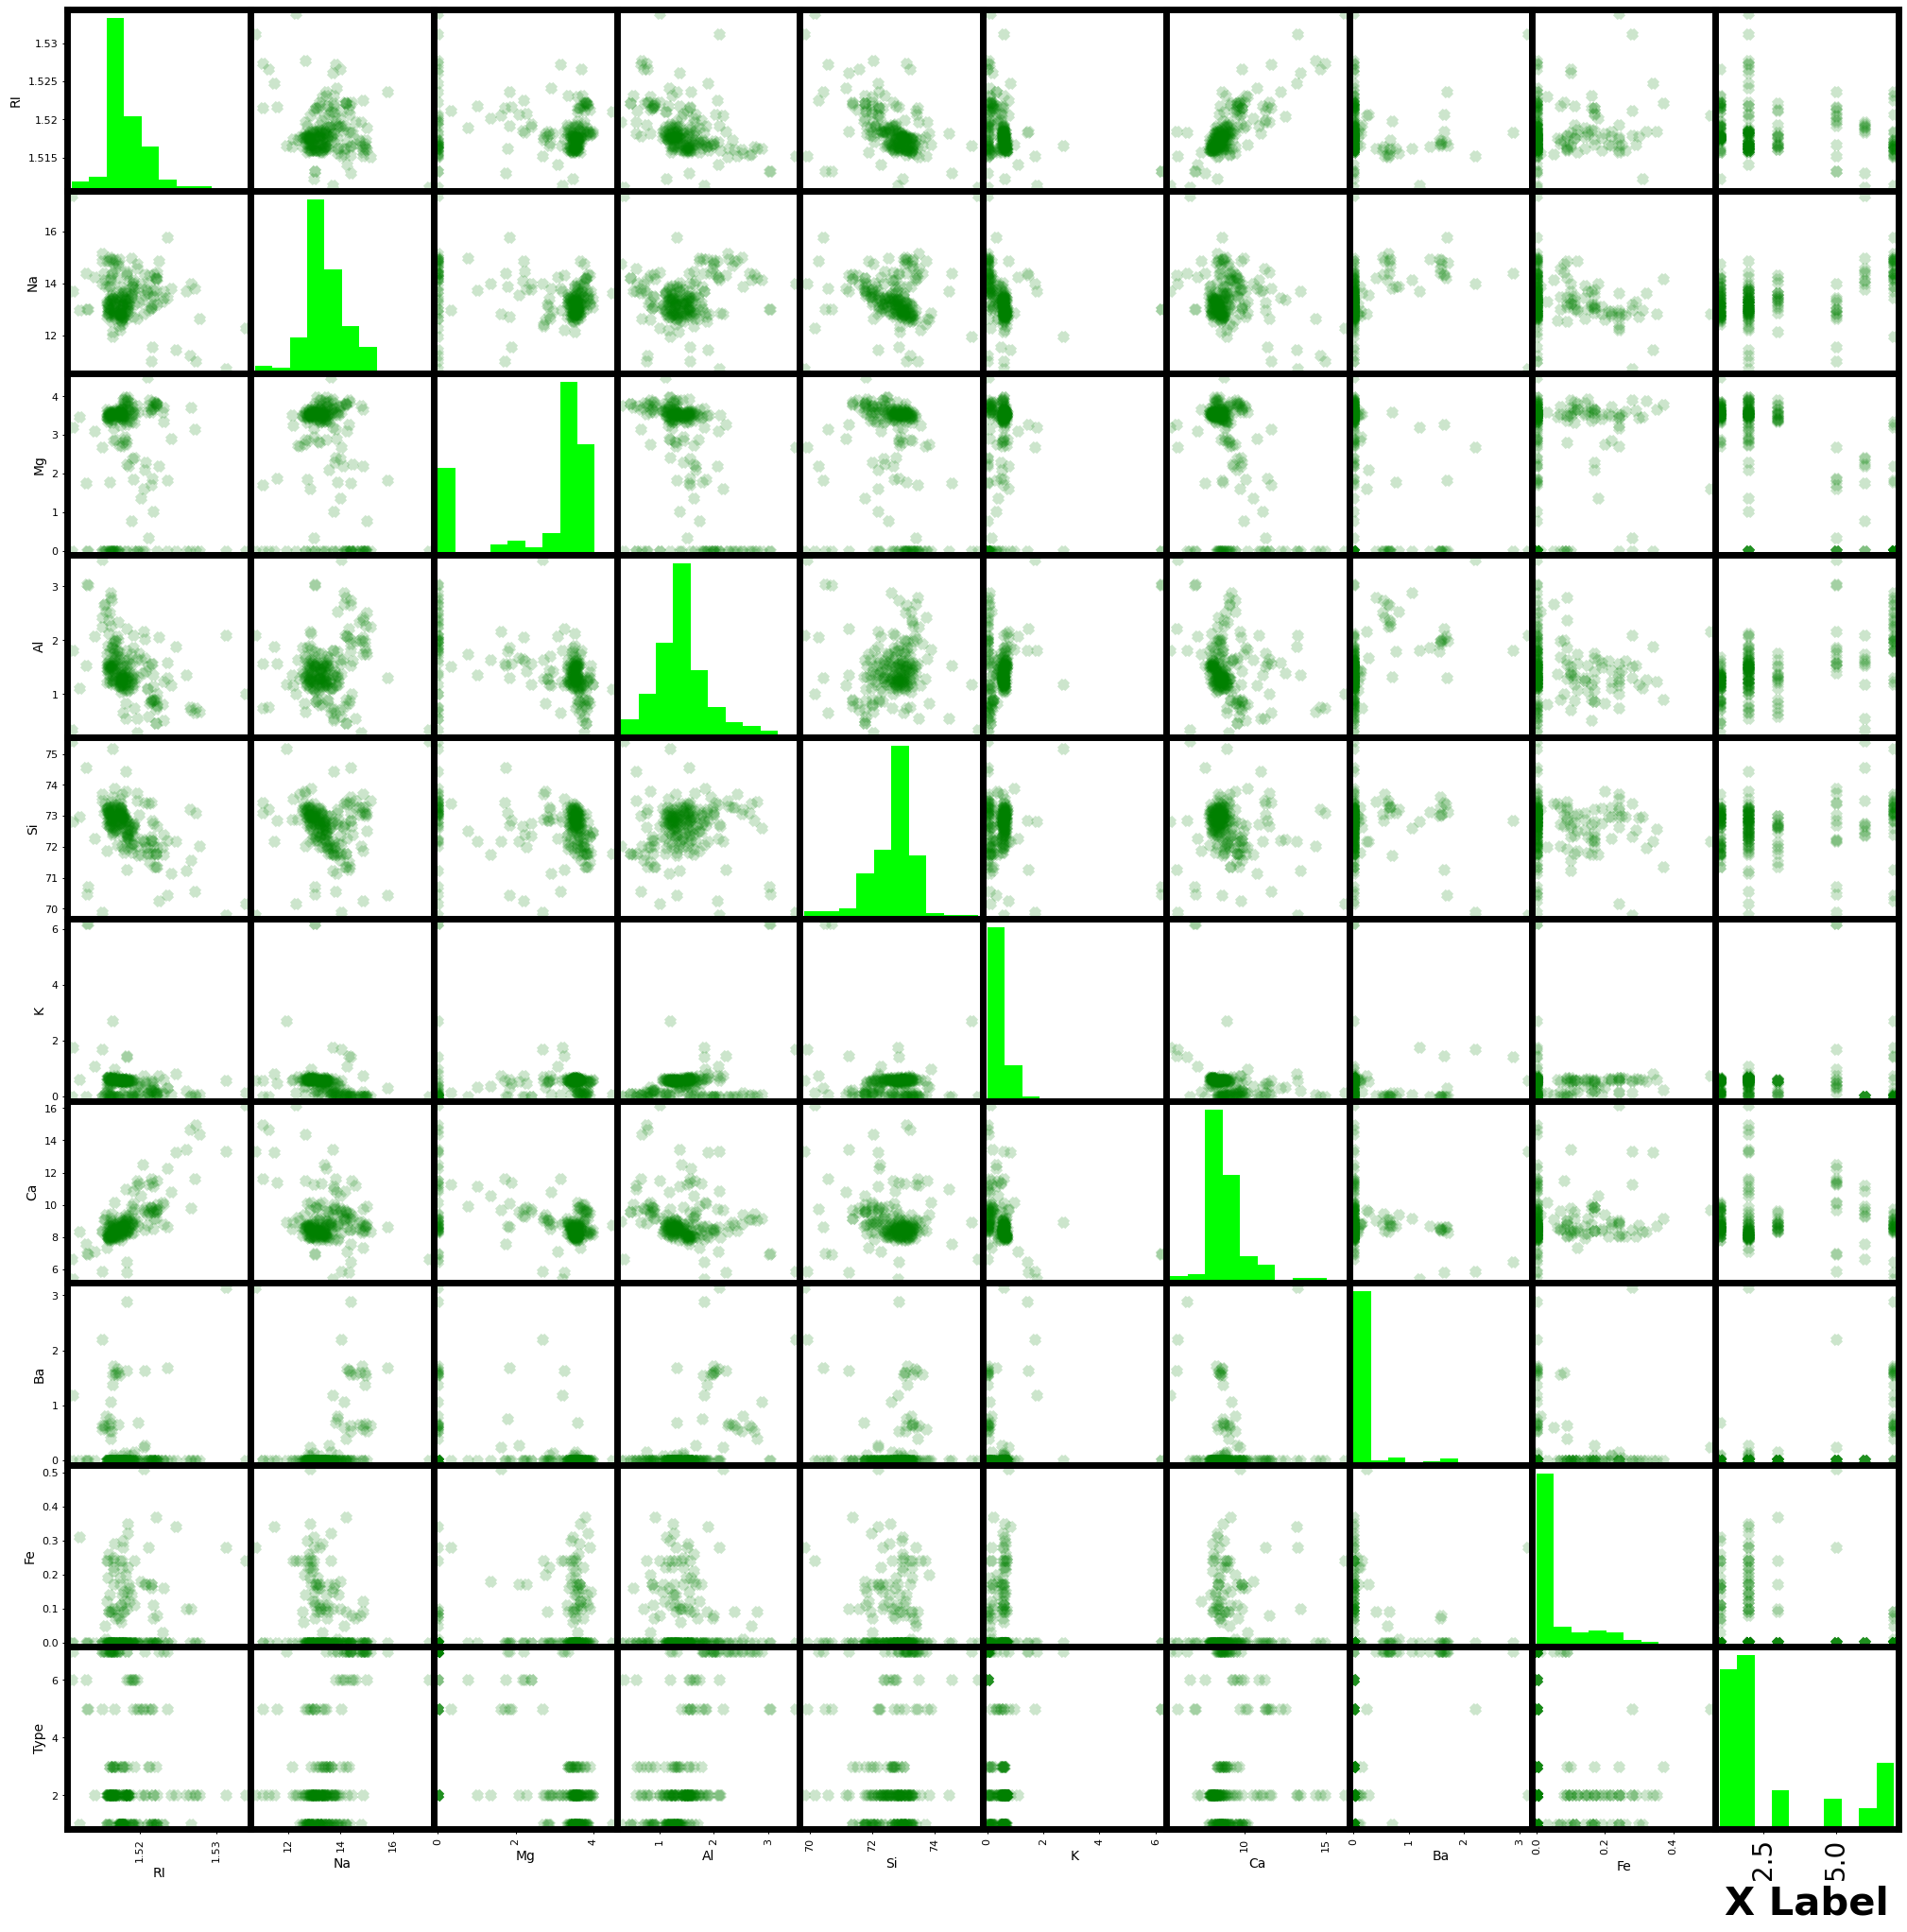

In [26]:
plt.figure()
mpl.rcParams['axes.linewidth'] = 5
scatter_matrix(data , alpha=0.2, linewidth=5, c='g', marker='x', hist_kwds={'color': 'lime'}, figsize=(25, 25))
plt.tick_params(axis='both', which='major', labelsize=20)
plt.xlabel('X Label', fontsize=30, weight='bold')
plt.ylabel('Y Label', fontsize=30, weight='bold')
plt.show()


# Here we can present the heatmap presentation of the data

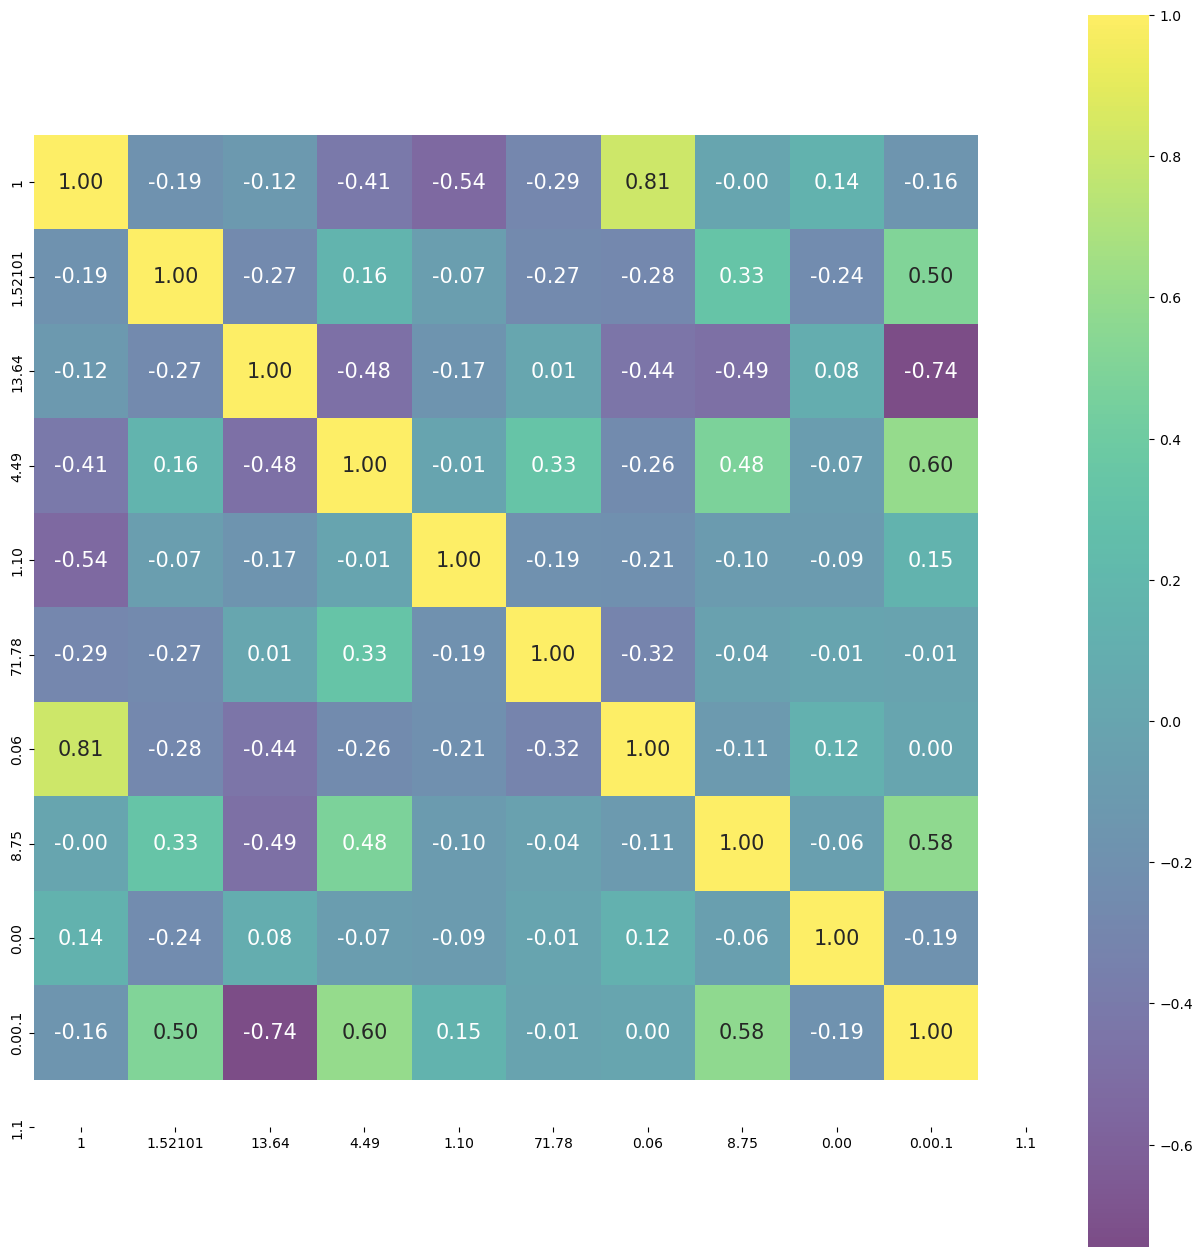

In [29]:
corr = data.corr()
plt.figure(figsize=(16,16))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           xticklabels=Data.columns.values, yticklabels= Data.columns.values, alpha = 0.7,   cmap= 'viridis')
plt.show()

# Here is the presentation of the counts for each class in the database

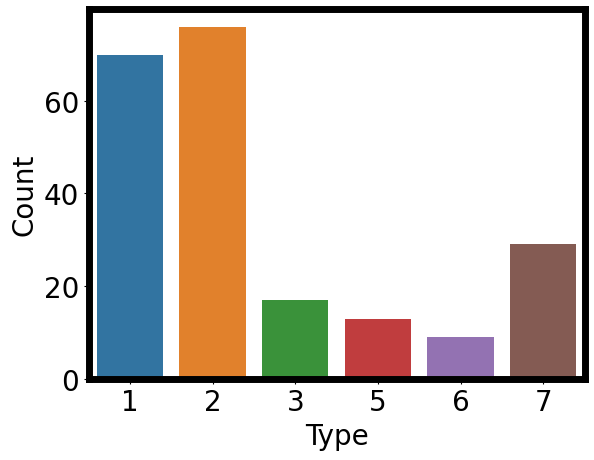

In [42]:
sns.countplot(x='Type', data=data, linewidth=5, label='big')
plt.xlabel('Type', fontsize=20)
plt.ylabel('Count', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

Now, we need to put the features and labels into numpy arrays. In addition to this, I have used the standardized transformation on the data to have zero mean and units standard deviation.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that 

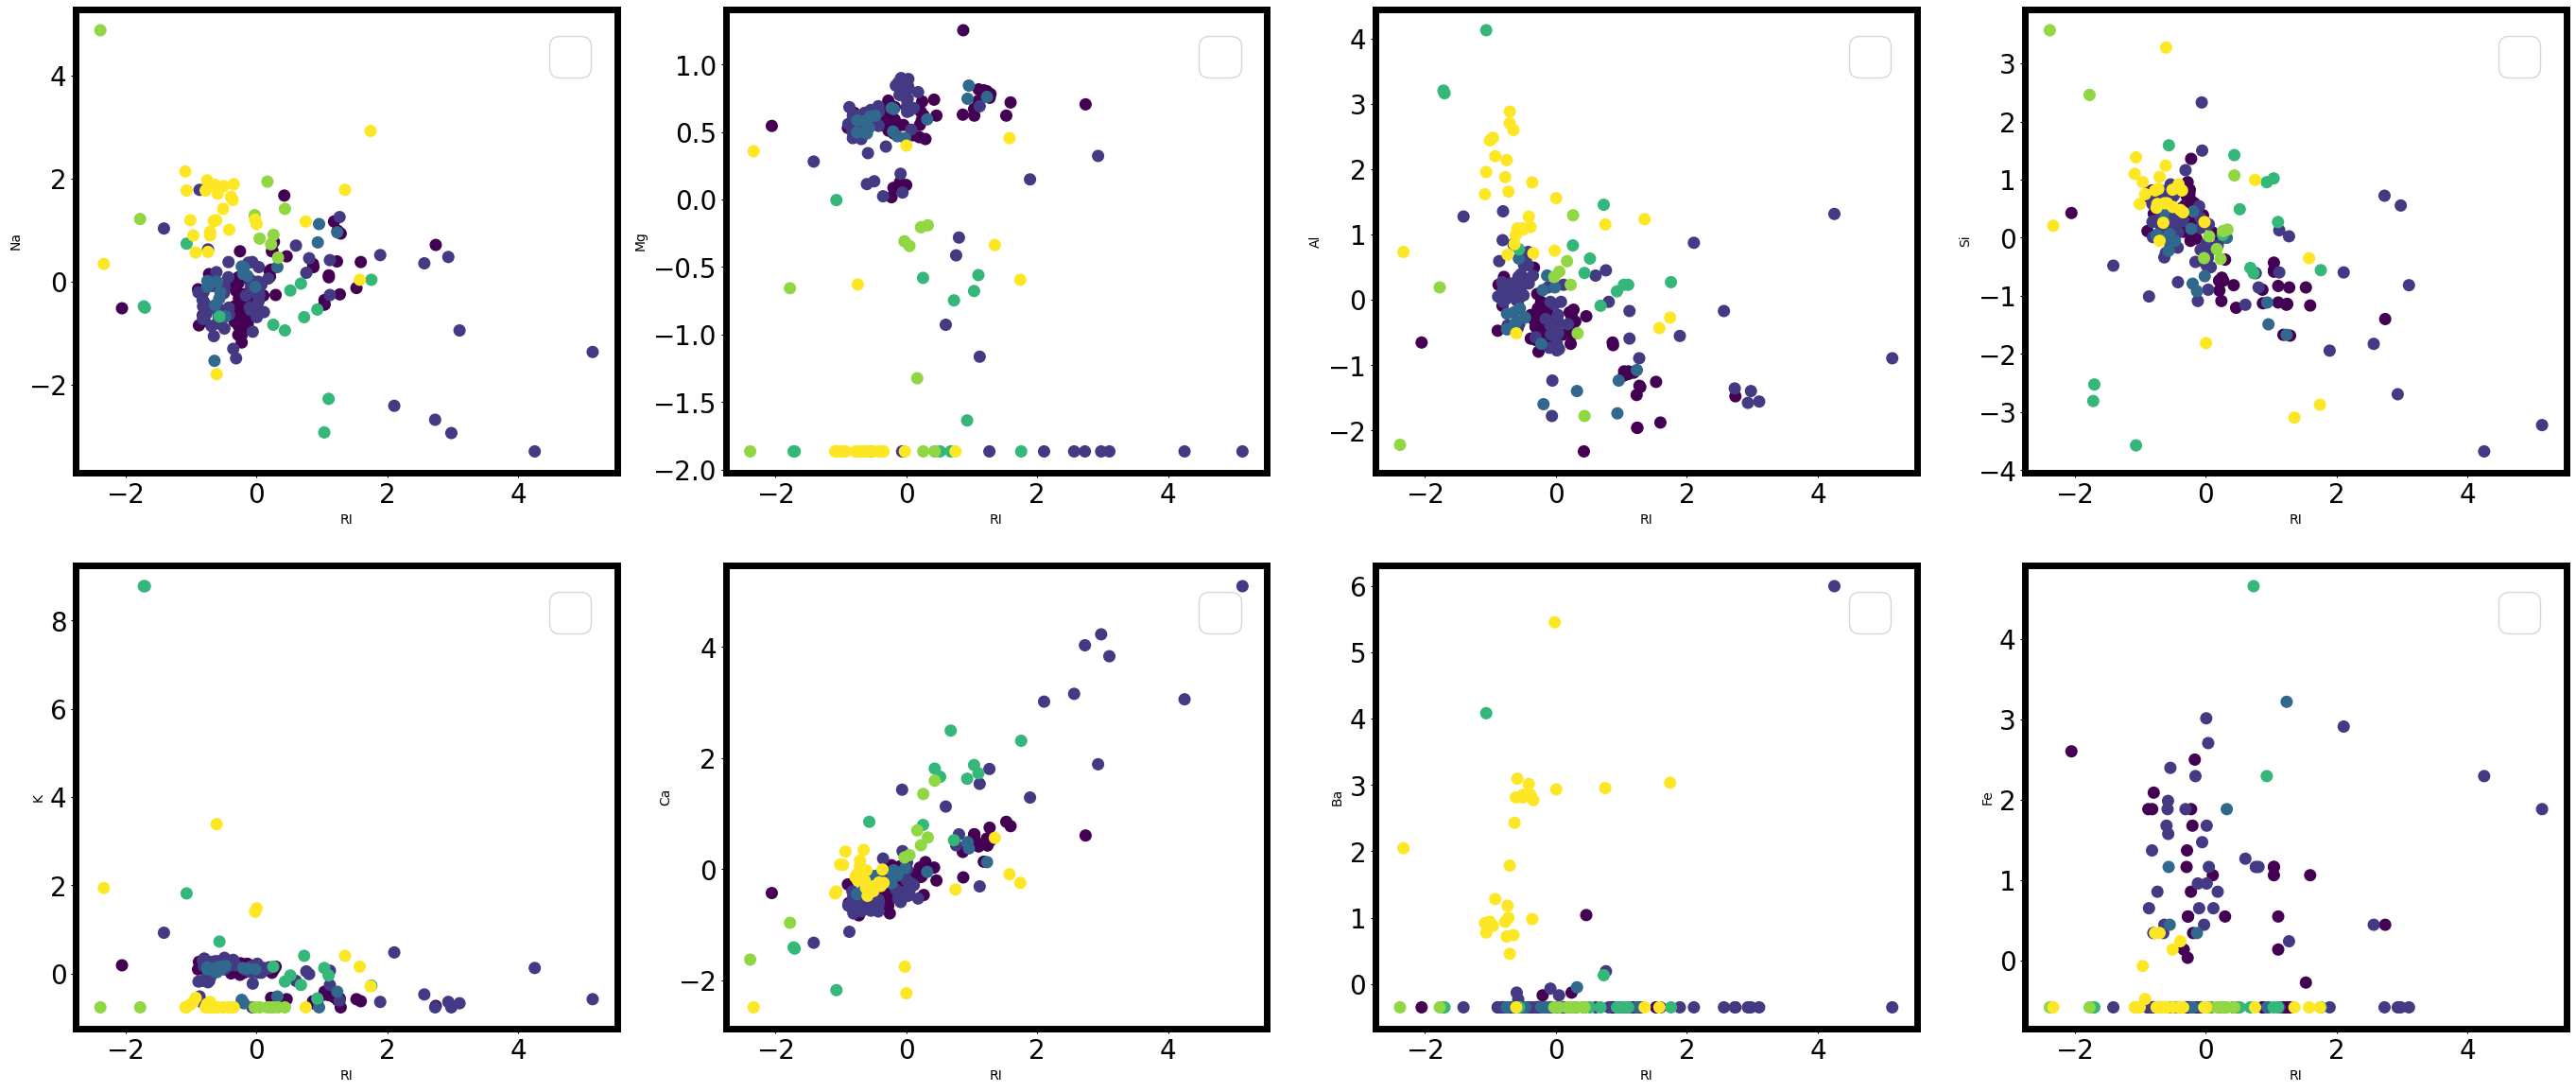

In [58]:
plt.figure(figsize=(34 , 14))
X_scaled = scale(X)

plt.subplot(2 , 4, 1)
plt.scatter(X_scaled[:,0] , X_scaled[:,1] ,s = 70, c = Y, cmap = "viridis"  )
plt.legend(loc = 0)
plt.xlabel("RI")
plt.ylabel("Na")

plt.subplot(2 , 4, 2)
plt.scatter(X_scaled[:,0] , X_scaled[:,2] ,s = 70, c = Y, cmap = "viridis"  )
plt.legend(loc = 0)
plt.xlabel("RI")
plt.ylabel("Mg")

plt.subplot(2 , 4, 3)
plt.scatter(X_scaled[:,0] , X_scaled[:,3] ,s = 70, c = Y, cmap = "viridis"  )
plt.legend(loc = 0)
plt.xlabel("RI")
plt.ylabel("Al")

plt.subplot(2 , 4, 4)
plt.scatter(X_scaled[:,0] , X_scaled[:,4] ,s = 70, c = Y, cmap = "viridis"  )
plt.legend(loc = 0)
plt.xlabel("RI")
plt.ylabel("Si")

plt.subplot(2 , 4, 5)
plt.scatter(X_scaled[:,0] , X_scaled[:,5] ,s = 70, c = Y, cmap = "viridis"  )
plt.legend(loc = 0)
plt.xlabel("RI")
plt.ylabel("K")

plt.subplot(2 , 4, 6)
plt.scatter(X_scaled[:,0] , X_scaled[:,6] ,s = 70, c = Y, cmap = "viridis"  )
plt.legend(loc = 0)
plt.xlabel("RI")
plt.ylabel("Ca")

plt.subplot(2 , 4, 7)
plt.scatter(X_scaled[:,0] , X_scaled[:,7] ,s = 70, c = Y, cmap = "viridis"  )
plt.legend(loc = 0)
plt.xlabel("RI")
plt.ylabel("Ba")

plt.subplot(2 , 4, 8)
plt.scatter(X_scaled[:,0] , X_scaled[:,8] ,s = 70, c = Y, cmap = "viridis"  )
plt.legend(loc = 0)
plt.xlabel("RI")
plt.ylabel("Fe")

plt.show()

As shown, each color represents one of the classes out of six present class in this data base. It is also clear that, the classifiation is not trivial for this data base. To test it out, I have started with five different classifiers, including Logistic Regression, Support Vector Machine with Linear kernel, Support Vector Machine with Radial Basis Function Kernel, Random Forests, and GradientBoostingTrees using One versus Rest classifiers. In this regard, for each classifier, the class is fitted against all the other classes. In addition to its computational efficiency, one advantage of this approach is its interpretability. Since each class is represented by one and only one classifier, it is possible to gain knowledge about the class by inspecting its corresponding classifier. This is the most commonly used strategy for multiclass classification and is a fair default choice.

To do this, first we need to define the training and testing dataset. I have used 75% of the data as training set and 25% of the data as the testing set:

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y,train_size=0.75, test_size=0.25)

# Logistic Regression

In [71]:
clf1 = OneVsRestClassifier(LogisticRegression(C =10 , random_state=1367))
clf1.fit(X_train , y_train)
y1 = clf1.predict(X_test)
print (classification_report(y_test , y1))
print ("Classification Accuracy = " + str(accuracy_score(y_test , y1)))

              precision    recall  f1-score   support

           1       0.52      0.61      0.56        18
           2       0.53      0.56      0.54        18
           3       0.00      0.00      0.00         6
           5       0.25      0.50      0.33         2
           6       1.00      1.00      1.00         3
           7       1.00      1.00      1.00         7

    accuracy                           0.59        54
   macro avg       0.55      0.61      0.57        54
weighted avg       0.54      0.59      0.57        54

Classification Accuracy = 0.5925925925925926


# Linear SVM

In [74]:
clf2 = OneVsRestClassifier(SVC(kernel='linear',C = 1,probability=True,random_state=1367))
clf2.fit(X_train , y_train)
y2 = clf2.predict(X_test)
print (classification_report(y_test , y2))
print ("Classification Accuracy = " + str(accuracy_score(y_test , y2)))

              precision    recall  f1-score   support

           1       0.50      0.83      0.62        18
           2       0.62      0.28      0.38        18
           3       0.00      0.00      0.00         6
           5       0.25      0.50      0.33         2
           6       1.00      0.67      0.80         3
           7       0.88      1.00      0.93         7

    accuracy                           0.56        54
   macro avg       0.54      0.55      0.51        54
weighted avg       0.55      0.56      0.51        54

Classification Accuracy = 0.5555555555555556


# RBF SVM

In [75]:
clf3 = OneVsRestClassifier(SVC(kernel='rbf',C = 100, gamma = 0.1, probability=True,random_state=1367))
clf3.fit(X_train , y_train)
y3 = clf3.predict(X_test)
print (classification_report(y_test , y3))
print ("Classification Accuracy = " + str(accuracy_score(y_test , y3)))

              precision    recall  f1-score   support

           1       0.64      0.78      0.70        18
           2       0.65      0.61      0.63        18
           3       0.33      0.17      0.22         6
           5       0.33      0.50      0.40         2
           6       1.00      0.67      0.80         3
           7       0.86      0.86      0.86         7

    accuracy                           0.65        54
   macro avg       0.63      0.60      0.60        54
weighted avg       0.64      0.65      0.64        54

Classification Accuracy = 0.6481481481481481


# Random Forests

In [78]:
clf4 = OneVsRestClassifier(RandomForestClassifier(n_estimators=200 ,min_samples_split=2 ,
                                                  min_samples_leaf=5, n_jobs=-1,  random_state=1367))
clf4.fit(X_train , y_train)
y4 = clf4.predict(X_test)
print (classification_report(y_test , y4))
print ("Classification Accuracy = " + str(accuracy_score(y_test , y4)))

              precision    recall  f1-score   support

           1       0.60      0.83      0.70        18
           2       0.67      0.67      0.67        18
           3       0.00      0.00      0.00         6
           5       0.00      0.00      0.00         2
           6       1.00      0.67      0.80         3
           7       1.00      1.00      1.00         7

    accuracy                           0.67        54
   macro avg       0.54      0.53      0.53        54
weighted avg       0.61      0.67      0.63        54

Classification Accuracy = 0.6666666666666666


# Gradient Boosting

In [80]:
clf5 = OneVsRestClassifier(GradientBoostingClassifier(n_estimators=200 , random_state=1367))
clf5.fit(X_train , y_train)
y5 = clf5.predict(X_test)
print (classification_report(y_test , y5))
print ("Classification Accuracy = " + str(accuracy_score(y_test , y5)))

              precision    recall  f1-score   support

           1       0.64      0.78      0.70        18
           2       0.76      0.72      0.74        18
           3       0.20      0.17      0.18         6
           5       0.50      0.50      0.50         2
           6       1.00      0.33      0.50         3
           7       1.00      1.00      1.00         7

    accuracy                           0.69        54
   macro avg       0.68      0.58      0.60        54
weighted avg       0.69      0.69      0.68        54

Classification Accuracy = 0.6851851851851852


As shown, by employing different classifiers we can improve the classification accuracy. But the question we need to answer is if the classification results can be trusted? Or is this the best classification method I can use for this database?

To answer the aforementioned questions, I have used Genetic Programming to find the best possible pipeline out of 100 possible pipelines in 100 generations. In addition to this , I have used 5-folds cross-validation to decrease the chanve of overfitting. At the end, the best pipeline will be printed out.

In [83]:
tpot = TPOTClassifier(generations=100, population_size=100,cv = 5, verbosity=2, n_jobs=-1 , random_state=1367)
tpot.fit(X_train, y_train)
print(tpot.score(X_test, y_test))

Optimization Progress:   0%|          | 0/10100 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.78125

Generation 2 - Current best internal CV score: 0.78125

Generation 3 - Current best internal CV score: 0.78125

Generation 4 - Current best internal CV score: 0.78125

Generation 5 - Current best internal CV score: 0.78125

Generation 6 - Current best internal CV score: 0.7875

Generation 7 - Current best internal CV score: 0.79375

Generation 8 - Current best internal CV score: 0.8

Generation 9 - Current best internal CV score: 0.8

Generation 10 - Current best internal CV score: 0.8

Generation 11 - Current best internal CV score: 0.8

Generation 12 - Current best internal CV score: 0.8

Generation 13 - Current best internal CV score: 0.8

Generation 14 - Current best internal CV score: 0.8

Generation 15 - Current best internal CV score: 0.8

Generation 16 - Current best internal CV score: 0.8

Generation 17 - Current best internal CV score: 0.8

Generation 18 - Current best internal CV score: 0.8

Generation 19 - Current bes

The other solution would be transforming the dataset to another subspace employing Principal Component Analysis. In this regard, I have designed a pipeline to determine the numbers of components that are necessary for the best classification.

In [86]:
pca = decomposition.PCA()
X_pca = pca.fit_transform(X)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


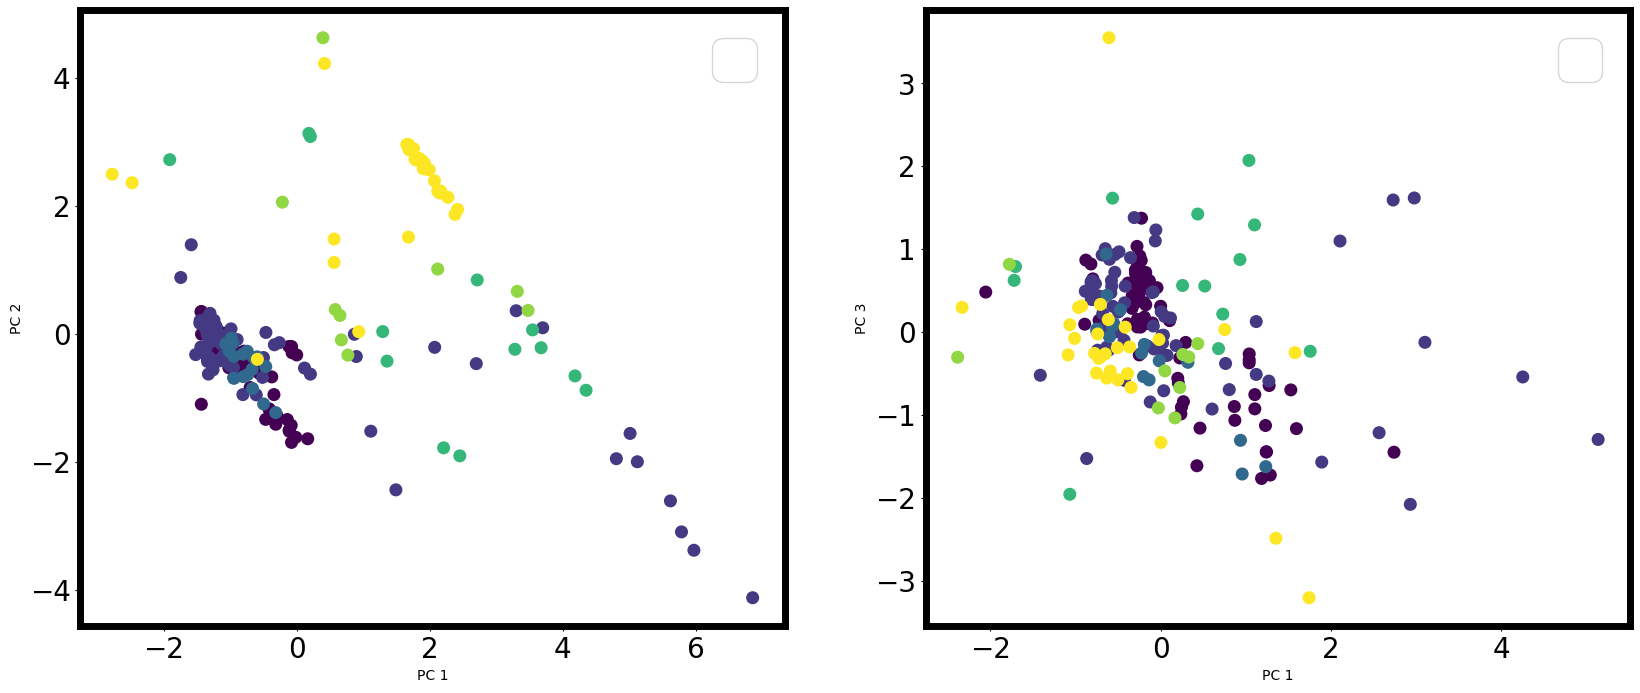

In [87]:
plt.rcParams["xtick.labelsize"] = 20
plt.rcParams["ytick.labelsize"] = 20
plt.rcParams["axes.labelsize"] = 30
plt.figure(figsize=(20 , 8))

plt.subplot(1 , 2, 1)
plt.scatter(X_pca[:,0] , X_pca[:,1] ,s = 70, c = Y, cmap = "viridis"  )
plt.legend(loc = 0)
plt.xlabel("PC 1")
plt.ylabel("PC 2")

plt.subplot(1 , 2, 2)
plt.scatter(X_scaled[:,0] , X_pca[:,2] ,s = 70, c = Y, cmap = "viridis"  )
plt.legend(loc = 0)
plt.xlabel("PC 1")
plt.ylabel("PC 3")

plt.show()

# PCA + Logistic Regression

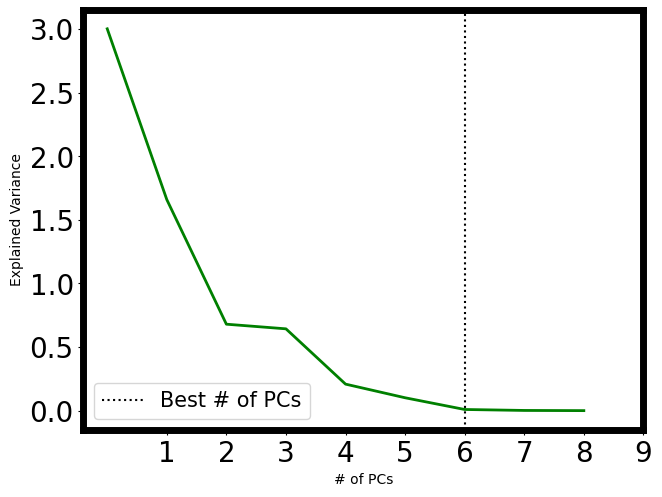

In [99]:
logistic = linear_model.LogisticRegression()
pca = decomposition.PCA()
pipe = Pipeline(steps=[('pca', pca), ('logistic', logistic)])
pca.fit(X)
plt.figure( figsize=(8, 6))
plt.axes([.2, .2, .7, .7])
plt.plot(pca.explained_variance_, linewidth=2, color = "green")
plt.axis('tight')
plt.xlabel('# of PCs')
plt.xticks(range(1,10))
plt.ylabel('Explained Variance')

n_components = range(1,10)
Cs = np.logspace(-4, 4, 3)
estimator = GridSearchCV(pipe,dict(pca__n_components=n_components,logistic__C=Cs))
estimator.fit(X, Y)

plt.axvline(estimator.best_estimator_.named_steps['pca'].n_components,
            linestyle=':', color = "k", label='Best # of PCs')
plt.legend(loc = 0 ,prop=dict(size=15))
plt.show()

In [100]:
pca = decomposition.PCA(n_components=6, svd_solver='full', random_state=1367)
X_pca = pca.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_pca, Y,train_size=0.75, test_size=0.25 , random_state = 1367)
clf1.fit(X_train , y_train)
y1 = clf1.predict(X_test)
print (classification_report(y_test , y1))
print ("Classification Accuracy = " + str(accuracy_score(y_test , y1)))

              precision    recall  f1-score   support

           1       0.84      0.80      0.82        20
           2       0.62      0.83      0.71        18
           3       0.00      0.00      0.00         4
           5       0.00      0.00      0.00         2
           6       0.67      1.00      0.80         2
           7       1.00      0.88      0.93         8

    accuracy                           0.74        54
   macro avg       0.52      0.58      0.54        54
weighted avg       0.69      0.74      0.71        54

Classification Accuracy = 0.7407407407407407


# PCA + Linear SVM

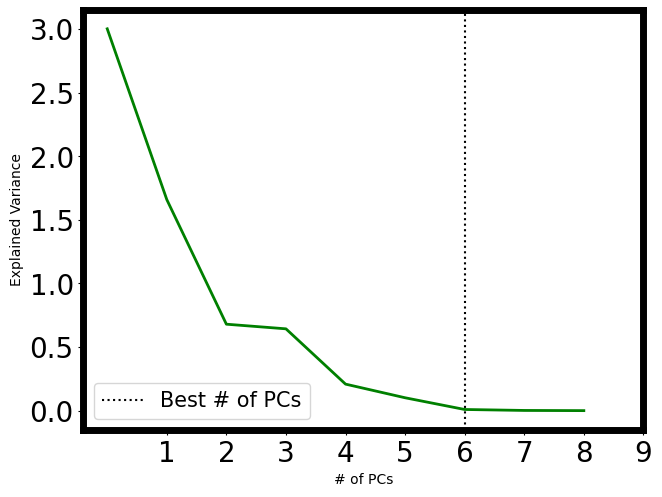

In [101]:
svm = SVC(kernel='linear',probability=True,random_state=1367)
pca = decomposition.PCA()
pipe = Pipeline(steps=[('pca', pca), ('svm', svm)])
pca.fit(X)
plt.figure( figsize=(8, 6))
plt.axes([.2, .2, .7, .7])
plt.plot(pca.explained_variance_, linewidth=2, color = "green")
plt.axis('tight')
plt.xlabel('# of PCs')
plt.xticks(range(1,10))
plt.ylabel('Explained Variance')

n_components = range(1,10)
Cs = [1 , 10 , 100]
estimator = GridSearchCV(pipe,dict(pca__n_components=n_components,svm__C=Cs))
estimator.fit(X, Y)

plt.axvline(estimator.best_estimator_.named_steps['pca'].n_components,
            linestyle=':', color = "k", label='Best # of PCs')
plt.legend(loc = 0 ,prop=dict(size=15))
plt.show()

In [102]:
pca = decomposition.PCA(n_components=5, svd_solver='full', random_state=1367)
X_pca = pca.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_pca, Y,train_size=0.75, test_size=0.25 , random_state = 1367)
clf2.fit(X_train , y_train)
y2 = clf2.predict(X_test)
print (classification_report(y_test , y2))
print ("Classification Accuracy = " + str(accuracy_score(y_test , y2)))

              precision    recall  f1-score   support

           1       0.58      0.95      0.72        20
           2       0.67      0.22      0.33        18
           3       0.00      0.00      0.00         4
           5       0.40      1.00      0.57         2
           6       0.50      0.50      0.50         2
           7       1.00      0.88      0.93         8

    accuracy                           0.61        54
   macro avg       0.52      0.59      0.51        54
weighted avg       0.62      0.61      0.55        54

Classification Accuracy = 0.6111111111111112


# PCA + RBF SVM

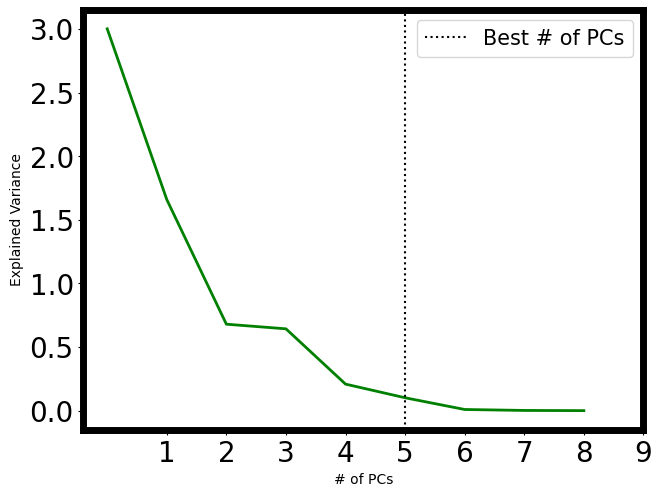

In [103]:
svm = SVC(kernel='rbf',probability=True,random_state=1367)
pca = decomposition.PCA()
pipe = Pipeline(steps=[('pca', pca), ('svm', svm)])
pca.fit(X)
plt.figure( figsize=(8, 6))
plt.axes([.2, .2, .7, .7])
plt.plot(pca.explained_variance_, linewidth=2, color = "green")
plt.axis('tight')
plt.xlabel('# of PCs')
plt.xticks(range(1,10))
plt.ylabel('Explained Variance')

n_components = range(1,10)
Cs = [1 , 10 , 100]
Gammas = [0.001 , 0.01, 0.1 , 1]
estimator = GridSearchCV(pipe,dict(pca__n_components=n_components,svm__C=Cs,svm__gamma=Gammas))
estimator.fit(X, Y)

plt.axvline(estimator.best_estimator_.named_steps['pca'].n_components,
            linestyle=':', color = "k", label='Best # of PCs')
plt.legend(loc = 0 ,prop=dict(size=15))
plt.show()

In [104]:
pca = decomposition.PCA(n_components=4, svd_solver='full', random_state=1367)
X_pca = pca.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_pca, Y,train_size=0.75, test_size=0.25 , random_state = 1367)
clf3.fit(X_train , y_train)
y3 = clf3.predict(X_test)
print (classification_report(y_test , y3))
print ("Classification Accuracy = " + str(accuracy_score(y_test , y3)))

              precision    recall  f1-score   support

           1       0.73      0.80      0.76        20
           2       0.63      0.67      0.65        18
           3       0.00      0.00      0.00         4
           5       0.00      0.00      0.00         2
           6       0.50      1.00      0.67         2
           7       0.86      0.75      0.80         8

    accuracy                           0.67        54
   macro avg       0.45      0.54      0.48        54
weighted avg       0.63      0.67      0.64        54

Classification Accuracy = 0.6666666666666666


# PCA + Random Forests

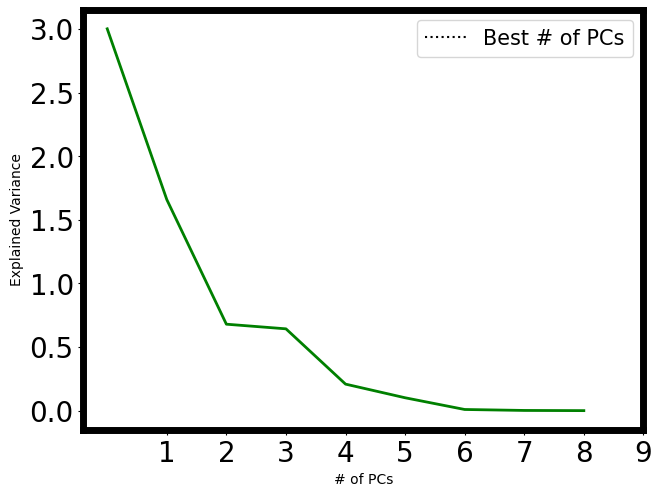

In [105]:
rf = RandomForestClassifier(random_state=1367)
pca = decomposition.PCA()
pipe = Pipeline(steps=[('pca', pca), ('rf', rf)])
pca.fit(X)
plt.figure( figsize=(8, 6))
plt.axes([.2, .2, .7, .7])
plt.plot(pca.explained_variance_, linewidth=2, color = "green")
plt.axis('tight')
plt.xlabel('# of PCs')
plt.xticks(range(1,10))
plt.ylabel('Explained Variance')

n_components = range(1,10)
trees = [30]

estimator = GridSearchCV(pipe,dict(pca__n_components=n_components,rf__n_estimators=trees))
estimator.fit(X, Y)

plt.axvline(estimator.best_estimator_.named_steps['pca'].n_components,
            linestyle=':', color = "k", label='Best # of PCs')
plt.legend(loc = 0 ,prop=dict(size=15))
plt.show()

In [106]:
clf4 = OneVsRestClassifier(RandomForestClassifier(n_estimators=40 ,min_samples_split=2 ,
                                                  min_samples_leaf=5, n_jobs=-1,  random_state=1367))
pca = decomposition.PCA(n_components=5, svd_solver='full', random_state=1367)
X_pca = pca.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_pca, Y,train_size=0.75, test_size=0.25 , random_state = 1367)
clf4.fit(X_train , y_train)
y4 = clf4.predict(X_test)
print (classification_report(y_test , y4))
print ("Classification Accuracy = " + str(accuracy_score(y_test , y4)))

              precision    recall  f1-score   support

           1       0.85      0.85      0.85        20
           2       0.75      0.83      0.79        18
           3       0.33      0.25      0.29         4
           5       0.00      0.00      0.00         2
           6       0.50      0.50      0.50         2
           7       1.00      1.00      1.00         8

    accuracy                           0.78        54
   macro avg       0.57      0.57      0.57        54
weighted avg       0.76      0.78      0.77        54

Classification Accuracy = 0.7777777777777778


# PCA + GradientBoosting

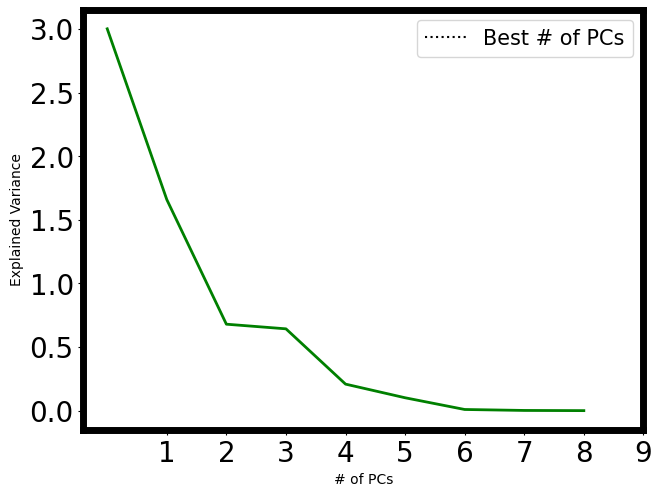

In [107]:
gb = GradientBoostingClassifier(random_state=1367)
pca = decomposition.PCA()
pipe = Pipeline(steps=[('pca', pca), ('gb', gb)])
pca.fit(X)
plt.figure( figsize=(8, 6))
plt.axes([.2, .2, .7, .7])
plt.plot(pca.explained_variance_, linewidth=2, color = "green")
plt.axis('tight')
plt.xlabel('# of PCs')
plt.xticks(range(1,10))
plt.ylabel('Explained Variance')

n_components = range(1,10)
trees = [10]

estimator = GridSearchCV(pipe,dict(pca__n_components=n_components,gb__n_estimators=trees))
estimator.fit(X, Y)

plt.axvline(estimator.best_estimator_.named_steps['pca'].n_components,
            linestyle=':', color = "k", label='Best # of PCs')
plt.legend(loc = 0 ,prop=dict(size=15))
plt.show()

In [108]:
clf5 = OneVsRestClassifier(GradientBoostingClassifier(n_estimators=20 ,min_samples_leaf= 5 ,min_samples_split=50,
                                                      max_depth= 7 ,random_state=1367))
pca = decomposition.PCA(n_components=4, svd_solver='full', random_state=1367)
X_pca = pca.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_pca, Y,train_size=0.75, test_size=0.25 , random_state = 1367)
clf5.fit(X_train , y_train)
y5 = clf5.predict(X_test)
print (classification_report(y_test , y5))
print ("Classification Accuracy = " + str(accuracy_score(y_test , y5)))

              precision    recall  f1-score   support

           1       0.81      0.65      0.72        20
           2       0.68      0.83      0.75        18
           3       0.40      0.50      0.44         4
           5       0.00      0.00      0.00         2
           6       1.00      0.50      0.67         2
           7       1.00      0.88      0.93         8

    accuracy                           0.70        54
   macro avg       0.65      0.56      0.59        54
weighted avg       0.74      0.70      0.71        54

Classification Accuracy = 0.7037037037037037


# Final result

In [111]:
YY = np.zeros((len(Y) , 1))
YY[:,0] = Y
enc = OneHotEncoder(handle_unknown='error')
enc.fit(YY)
Y_transformed = enc.transform(YY)

In [112]:
print ("The Shape of the Transformed Class Labels = " + str(np.shape(Y_transformed)))

The Shape of the Transformed Class Labels = (214, 6)
